# ratio of workers to managers as a function of depth

In [1]:
import pandas
print("pandas",pandas.__version__)
import sys
print(sys.version_info)
from matplotlib import pyplot as plt
import matplotlib
print("matplotlib",matplotlib.__version__)

pandas 1.5.2
sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
matplotlib 3.6.2


In [2]:
def create_df_for_hierarchy(max_depth:int, branching:int):
    df = pandas.DataFrame({"depth":range(1,max_depth)})
    df["depth offset by 1"] = df["depth"]-1
    df["leaf nodes"] = branching**df["depth offset by 1"]

    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
    df.drop(["depth offset by 1"], axis=1, inplace=True)

    df["total nodes"] = 1;

    for index in range(1,df.shape[0]):
        #print(index)
        df["total nodes"][index]=df["total nodes"][index-1]+df["leaf nodes"][index]
        #print(df["total nodes"][index])

    df["ratio of managers to workers"] = (df["total nodes"]-df["leaf nodes"])/df["leaf nodes"]
    
    return df

In [3]:
max_depth = 7
branching = 3

df = create_df_for_hierarchy(max_depth, branching)

all_results = [{'dataframe': df, 
                'max depth': max_depth, 
                'branching': branching}]

In [4]:
branching = 5

df = create_df_for_hierarchy(max_depth, branching)

all_results.append({'dataframe': df, 
                    'max depth': max_depth, 
                    'branching': branching})

In [5]:
branching = 7

df = create_df_for_hierarchy(max_depth, branching)

all_results.append({'dataframe': df, 
                    'max depth': max_depth, 
                    'branching': branching})

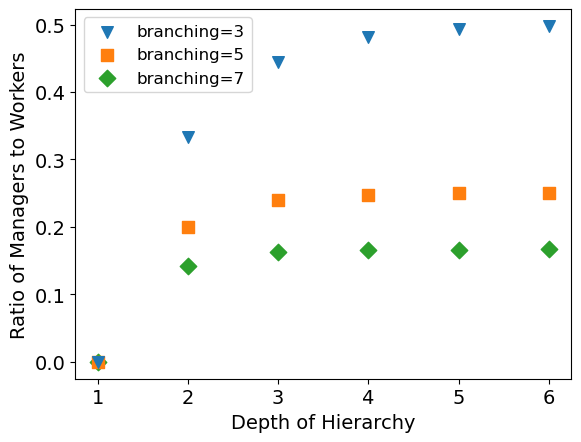

In [6]:
# https://matplotlib.org/stable/api/markers_api.html
shape_list = ["v", "s", "D"]

wrong_zorder = [10, 5, 0] # https://stackoverflow.com/a/37251490/1164295

legend_font_size = 12
axis_label_font_size = 14

#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 22}

for index, result in enumerate(all_results):
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
    plt.scatter(x=result['dataframe']['depth'], 
                y=result['dataframe']["ratio of managers to workers"],
                label="branching="+str(result['branching']),
                marker=shape_list[index],
                s=70,
                zorder=wrong_zorder[index])

plt.xlabel("Depth of Hierarchy", fontsize=axis_label_font_size)
plt.ylabel("Ratio of Managers to Workers", fontsize=axis_label_font_size)
#plt.title("ratio of workers to managers as a function of hierarchical depth");
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# https://stackoverflow.com/a/7125157/1164295
plt.gca().legend(prop={'size': legend_font_size})

# https://stackoverflow.com/a/11386056/1164295
plt.gca().tick_params(axis='both', which='major', labelsize=axis_label_font_size);

plt.savefig("growth_of_bureaucracy.png", dpi=300)
plt.savefig("growth_of_bureaucracy.pdf", dpi=300)
